# Juntando os Dados Censitários ao Dataset

In [2]:
%matplotlib inline
import geopandas as gpd

In [3]:
setor = gpd.read_file('./data/Mapas/RJ-SETOR/RJ-SETOR.shp')
geo_dados = gpd.read_file('./data/Mapas/RJ-DATASET/DATASET.shp')

In [4]:
setor

,ID1,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODD,NM_DISTRIT,CD_GEOCODS,NM_SUBDIST,CD_GEOCODM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,geometry
0,408203,330455705300140,URBANO,330455705140,Costa Barros,330455705,RIO DE JANEIRO,330455705,PAVUNA,3304557,...,2.44,865.00,853496.00,1000.39,851626.14,539.62,577184.79,879.99,642059.29,"POLYGON ((667.016 7474.986, 667.043 7475.005, ..."
1,408204,330455705300141,URBANO,330455705140,Costa Barros,330455705,RIO DE JANEIRO,330455705,PAVUNA,3304557,...,2.25,746.23,400714.52,856.36,365433.86,489.76,319508.08,776.84,283719.10,"POLYGON ((667.363 7475.226, 667.340 7475.194, ..."
2,408205,330455705300142,URBANO,330455705140,Costa Barros,330455705,RIO DE JANEIRO,330455705,PAVUNA,3304557,...,2.38,873.25,599998.55,987.60,565496.46,574.79,577333.14,883.40,614759.44,"POLYGON ((667.305 7475.856, 667.299 7475.873, ..."
3,408198,330455705300135,URBANO,330455705140,Costa Barros,330455705,RIO DE JANEIRO,330455705,PAVUNA,3304557,...,2.43,546.45,268682.25,701.42,235688.46,382.13,205907.30,642.09,178882.45,"MULTIPOLYGON (((666.791 7475.488, 666.791 7475..."
4,408199,330455705300136,URBANO,330455705140,Costa Barros,330455705,RIO DE JANEIRO,330455705,PAVUNA,3304557,...,2.37,530.38,173914.73,692.98,114118.18,345.61,155947.84,657.36,91425.38,"POLYGON ((666.751 7475.226, 666.793 7475.255, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10499,410671,330455705310240,URBANO,330455705142,Guaratiba,330455705,RIO DE JANEIRO,330455705,GUARATIBA,3304557,...,3.85,1149.14,785889.11,1297.42,693426.02,605.47,586039.11,1116.17,509653.65,"POLYGON ((644.192 7461.998, 644.186 7462.004, ..."
10500,410672,330455705310241,URBANO,330455705142,Guaratiba,330455705,RIO DE JANEIRO,330455705,GUARATIBA,3304557,...,2.29,870.29,240071.86,959.55,178251.94,514.99,268142.31,888.88,129521.98,"POLYGON ((644.023 7461.955, 644.021 7461.904, ..."
10501,410673,330455705310242,URBANO,330455705142,Guaratiba,330455705,RIO DE JANEIRO,330455705,GUARATIBA,3304557,...,2.36,901.30,1096450.73,1025.08,1120250.27,545.51,634154.49,889.08,728301.71,"POLYGON ((645.821 7459.876, 645.820 7459.870, ..."
10502,410674,330455705310243,URBANO,330455705142,Guaratiba,330455705,RIO DE JANEIRO,330455705,GUARATIBA,3304557,...,2.61,819.88,877378.56,964.57,892711.30,484.73,490658.06,813.16,556172.37,"POLYGON ((645.953 7460.220, 645.918 7460.249, ..."


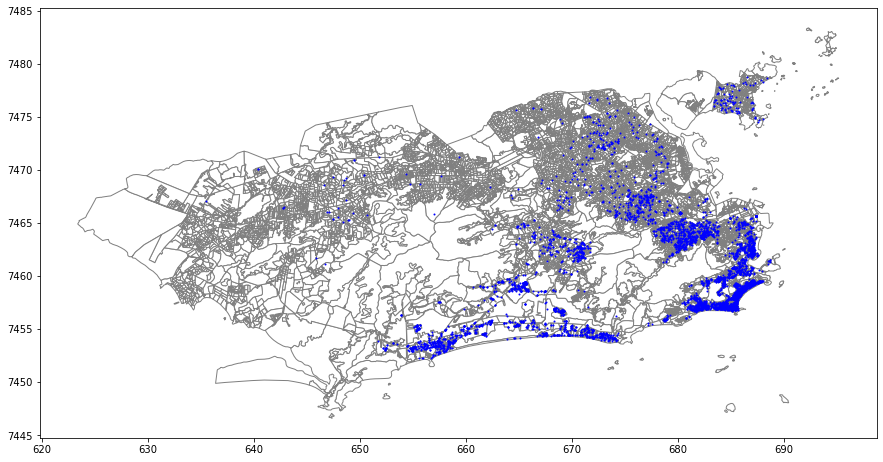

In [5]:
base = setor.plot(color = 'white', edgecolor = 'gray', figsize = (15, 8))
geo_dados.plot(ax = base, color = 'blue', markersize = 1)

In [6]:
geo_dados.shape

(4513, 18)

In [7]:
geo_dados = gpd.sjoin(geo_dados, setor, how='left', op='within')

/home/yorinori/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [8]:
geo_dados.shape

(4516, 65)

In [9]:
geo_dados.index.duplicated(keep='first')

array([False, False, False, ..., False, False, False])

In [10]:
~geo_dados.index.duplicated(keep='first')

array([ True,  True,  True, ...,  True,  True,  True])

In [11]:
geo_dados = geo_dados[~geo_dados.index.duplicated(keep='first')]

In [12]:
geo_dados.shape

(4513, 65)

In [13]:
geo_dados.crs

<Derived Projected CRS: PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["D_Unk ...>
Name: unknown
Axis Info [cartesian]:
- [east]: Easting (kilometre)
- [north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: D_Unknown_based_on_GRS80_ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [15]:
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [16]:
geo_dados.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [17]:
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,...,2.73,1.26,7337.38,1.587736e+08,7628.55,1.628856e+08,4098.24,81102256.68,5808.81,1.051217e+08
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,...,2.94,1.36,5111.83,1.231306e+07,5250.67,1.191751e+07,2779.32,10415304.75,4002.97,1.010219e+07
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,...,3.37,2.36,608.70,3.166441e+05,827.62,2.490475e+05,485.98,349437.69,800.72,3.236764e+05
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,...,3.27,1.94,7979.64,9.626894e+07,10382.30,1.003192e+08,4194.83,64288652.46,8024.48,9.228171e+07
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,...,2.87,1.67,4951.23,1.982453e+07,5078.19,1.968771e+07,3044.86,16492947.24,4180.23,1.789912e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,...,3.25,1.91,1954.20,3.700132e+06,2082.67,3.675734e+06,1074.66,5248962.41,1678.93,7.189208e+06
4509,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,...,3.27,3.51,1192.78,1.046433e+06,1257.61,1.021509e+06,779.14,836700.66,1132.52,8.158643e+05
4510,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,...,2.61,1.78,6380.67,3.981706e+07,7527.75,3.832342e+07,3699.27,28991808.11,6035.66,3.322869e+07
4511,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,...,2.98,2.07,3658.92,1.315820e+07,3860.94,1.310438e+07,2177.88,8720061.58,2981.62,9.544183e+06


In [18]:
geo_dados.columns

Index(['Area', 'Bairro', 'Cidade', 'Endereco', 'Estado', 'Latitude',
       'Longitude', 'Quartos', 'Suites', 'Vagas', 'Tipo', 'Transacao', 'Valor',
       'Dist_Metro', 'Dist_Trans', 'Dist_Tra_1', 'Dist_Praia', 'geometry',
       'index_right', 'ID1', 'CD_GEOCODI', 'TIPO', 'CD_GEOCODB', 'NM_BAIRRO',
       'CD_GEOCODD', 'NM_DISTRIT', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODM',
       'NM_MUNICIP', 'NM_MESO', 'NM_MICRO', 'Cod_setor', 'Cod_Grande',
       'Nome_Grand', 'Cod_UF', 'Nome_da_UF', 'Cod_meso', 'Nome_da_me',
       'Cod_micro', 'Nome_da_mi', 'Cod_RM', 'Nome_da_RM', 'Cod_munici',
       'Nome_do_mu', 'Cod_distri', 'Nome_do_di', 'Cod_subdis', 'Nome_do_su',
       'Cod_bairro', 'Nome_do_ba', 'Situacao_s', 'Tipo_setor', 'V001', 'V002',
       'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'V011',
       'V012'],
      dtype='object')

In [19]:
geo_dados.to_file('./data/Mapas/RJ-DATASET/DATASET.shp')

/home/yorinori/anaconda3/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
<ipython-input-19-6fba25035028>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geo_dados.to_file('./data/Mapas/RJ-DATASET/DATASET.shp')
